# Movie Recommendation System

Project by Harshad Pardeshi, Krutika Deshpande, Prithvi Kamath under the guidance of Prof. Dino Konstantopoulos.

# Downloading MovieLens dataset from the GroupLens website

In [1]:
#Importing required packages
import pandas as pd
import datetime
import numpy as np
import os
import urllib.request
pd.set_option('display.max_columns', 23)
import matplotlib.pyplot as plt

In [2]:
ml_20m_url = 'http://files.grouplens.org/datasets/movielens/ml-20m.zip'
ml_1m_url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'

In [3]:
dataset = os.path.join('..\\','Data', 'ml-20m')
ml_20m_path = os.path.join(dataset, 'ml-20m.zip')
ml_1m_path = os.path.join(dataset, 'ml-latest-small.zip')

In [4]:
if not os.path.exists(ml_1m_path):
    os.makedirs(ml_1m_path)

In [5]:
small_f = urllib.request.urlretrieve (ml_1m_url, ml_1m_path)

In [6]:
import zipfile

with zipfile.ZipFile(ml_1m_path, "r") as z:
    z.extractall(dataset)

with zipfile.ZipFile(ml_20m_path, "r") as z:
    z.extractall(dataset)

# Exploratory Data Analysis

# Creating Cleaned Movies dataset for Data Exploration

In [7]:
#Importing movies dataset from Data folder
movies=pd.read_csv('..\\Data\\ml-20m\\ml-20m\\movies.csv')

In [8]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We see that Genre for each movie is combined into 1 column. To explore how the genre and ratings are related, we split the genres into different columns and insert 1/0 for each movie.

We implented this in 2 methods and used the most time efficient method

In [9]:
#Method 1:
#Step 1: Create add new column in the movies dataframe and insert 1 where the genre is found
#Step 2: Fill the NA's with 0

print(datetime.datetime.now())
#Creating different columns for each genre and inserting 1/0 for each movie
for i,row in movies.iterrows():
    for x in row['genres'].split("|"):
        movies.at[i,x]=1
        
movies=movies.fillna(0)
print(datetime.datetime.now())

2018-08-07 14:46:15.903091
2018-08-07 14:46:18.672690


#Time consuming method
#Method 2:
#Step 1: Create add new column in the movies dataframe and insert 0 for all the genres for all movies
#Step 2: Insert 1 for a specific genre for the specific movie.

print(datetime.datetime.now())

for i,row in movies.iterrows():
    for x in row['genres'].split("|"):
        movies[x]=0
        
for i,row in movies.iterrows():
    for x in row['genres'].split("|"):
        movies.at[i,x]=1
        
print(datetime.datetime.now())

#Takes 10 seconds more for 15 million records

In [10]:
#Display all the columns
pd.set_option('display.max_columns', 23)
movies.head(5)

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
col_list=movies.columns.values[3:]
col_list

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [12]:
movies['Genre_Count'] = movies[col_list].sum(axis=1)

In [13]:
#Saving the output to CleanedMovies.csv in an Output folder
movies.to_csv('..\\Output\\CleanedMovies.csv')

## Create Ratings Sample for visualization

In [14]:
#Importing rating dataset from Data folder
ratings=pd.read_csv('..\\Data\\ml-20m\\ml-20m\\ratings.csv')

In [15]:
#Find the lowest count of movies for a specific rating to get a downsampling size
sampleSize=ratings.groupby("rating").count().reset_index()['userId'].min()
sampleSize

239125

In [16]:
#Saving unique ratings into a numpy array
value=ratings['rating'].unique()
value

array([ 3.5,  4. ,  3. ,  4.5,  5. ,  2. ,  1. ,  2.5,  0.5,  1.5])

In [17]:
RatingSampledf=pd.DataFrame()

In [18]:
for ratingValue in value:
    filtereddf = ratings.loc[lambda x: x['rating'] == ratingValue]
    sampledf=filtereddf.sample(sampleSize)
    RatingSampledf=pd.concat([RatingSampledf, sampledf],axis=0)
print("Sample created")

Sample created


In [19]:
len(RatingSampledf)

2391250

In [20]:
#Saving the output to SampleRatings.csv in an Output folder
RatingSampledf.to_csv("..\\Output\\SampleRatings.csv")

# Create a WordCloud for genres of top 100 movies with maximum ratings

A WordCloud of genres based on the rating count for the top 100 movies will give you the genres that most movies are based on.

In [21]:
#Select top 100 values using 'nlargest'
top100ratings=ratings.groupby('movieId').count().nlargest(100,'rating').reset_index()

In [22]:
movie_rating=pd.merge(top100ratings,movies, on='movieId', how='inner')

In [23]:
#Convert dataframe to list
Genres=movie_rating['genres'].values.tolist()

In [24]:
#Join list values
Genres=",".join(Genres).join(("",""))

In [25]:
#Replace '|' with ',' and then replace ',' with ',\n' to save the entire dataset into an excel
GenresString=Genres.replace('|',',')
GenresString=GenresString.replace(',',',\n')

In [26]:
f = open('..\\Output\\GenreString.csv','w')
f.write(GenresString) #Give your csv text here.
## Python will convert \n to os.linesep
f.close()

# Check sparsity

We tried finding the sparsity for the user vs movie rating for all the movies and tried the below methods

In [27]:
#Method 1:
#Find the total movies, user and ratings and calculate the sparsity mathematically
movielen=len(movies['movieId'].unique())
userlen=len(ratings['userId'].unique())
sparsity=(len(ratings)*100)/(movielen*userlen)
print(sparsity)

0.5294139230357805


#Method 2: <br />
#Step 1: Create a dataframe of size len(users) X len(movie) with 0 <br />
#Step 2: Add the rating for a user in the corresponsding movie column <br />
#Step 3: Find sparsity by taking the length of non-zero, dividing this value with the shape of user X movies and multiplying the #entire value with 100 <br />
 <br />
sparsedf = np.zeros((userlen, movielen)) <br />
for row in ratings.itertuples(): <br />
    sparsedf[row[1]-1, row[2]-1] = row[3] <br />
<br />
sparsity = float(len(sparsedf.nonzero()[0])) <br />
sparsity /= (sparsedf.shape[0] * sparsedf.shape[1]) <br />
sparsity *= 100 <br />
print('Sparsity: {:4.2f}%'.format(sparsity)) <br />
 <br />
#Error encoundered: <br />
#MovieId and count of movies varies and leads to index out of bound error

#Method 3: <br />
#Step 1: Creating a datframe and adding 1 in the corresponding movie column for a specific user
 <br />
newratings=pd.DataFrame() <br />
for i,row in ratings.iterrows():  <br />
    newratings.at[row['movieId'],row['userId']]=1  <br />
 <br />
newratings=newratings.fillna(0) <br />
<br />
#Error Encountered:
#Takes more than 100 minutes to execute for 20 million observations

# Implementing MLE

Comparing the dirtribution of ratings for movie1 as compared to the overall ratings for all movies.

In [39]:
movie1=ratings[ratings['movieId'] == 1]
movie1['ceiled_ratings'] = movie1['rating'].apply(np.ceil)

C:\Users\kruts\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [40]:
import random
#We are sampling the movies into 5 bins based on ratings
sample=movie1['ceiled_ratings'].tolist()
x = np.linspace(1,5,100)

In [41]:
from scipy.stats import norm
parameters = norm.fit(sample)

In [42]:
#Find the mean and standard deviation of the sample
mean=parameters[0]
std=parameters[1]
print("Mean: ",mean)
print("Variance: ",std)

Mean:  4.01776838716
Variance:  0.885124412816


In [43]:
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])

C:\Users\kruts\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


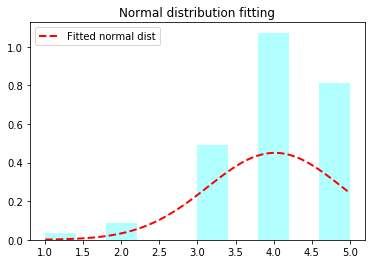

In [44]:
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
#plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(sample,normed=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting")
# insert a legend in the plot (using label)
plt.legend()

# we finally show our work
plt.show()

# Form Spark RDDs

In [28]:
from pyspark import SparkContext
sc = SparkContext()

In [29]:
def read_file(file_path):
    raw_data = sc.textFile(file_path)
    raw_data_header = raw_data.take(1)[0]   
    return raw_data, raw_data_header

In [30]:
def remove_header(raw_data, raw_data_header,number_cols):
    if(number_cols == 3):
        data = raw_data.filter(lambda line: line!=raw_data_header)\
        .map(lambda line: line.split(",")).map(lambda tokens: (int(tokens[0]),int(tokens[1]),float(tokens[2]))).cache()
        return data
    elif(number_cols == 2):
        data = raw_data.filter(lambda line: line!=raw_data_header)\
        .map(lambda line: line.split(",")).map(lambda tokens: (tokens[0],tokens[1])).cache()
        return data

In [31]:
def train_ALS(train_RDD, test_RDD, rank, seed, iterations, lambda_=0.01):
    test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))
    
    model = ALS.train(train_RDD, rank, seed=seed, iterations=iterations, lambda_=lambda_)
    predictions = model.predictAll(test_for_predict_RDD).map(lambda r: ((r[0], r[1]), r[2]))
    rates_and_preds = test_RDD.map(lambda r: ((int(r[0]), int(r[1])), float(r[2]))).join(predictions)
    error = math.sqrt(rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean())
    return error

In [32]:
def get_counts_and_averages(ID_and_ratings_tuple):
    nratings = len(ID_and_ratings_tuple[1])
    return ID_and_ratings_tuple[0], (nratings, float(sum(x for x in ID_and_ratings_tuple[1]))/nratings)

In [33]:
small_ratings_file = os.path.join(dataset, 'ml-latest-small', 'ratings.csv')
print('small_ratings_file: '+ small_ratings_file)
small_ratings_raw_data , small_ratings_raw_data_header = read_file(small_ratings_file)

small_ratings_file: ..\Data\ml-20m\ml-latest-small\ratings.csv


In [34]:
small_ratings_data = remove_header(small_ratings_raw_data, small_ratings_raw_data_header, 3)

In [35]:
small_ratings_data.take(3)

[(1, 31, 2.5), (1, 1029, 3.0), (1, 1061, 3.0)]

In [36]:
small_movies_file = os.path.join(dataset, 'ml-latest-small', 'movies.csv')

small_movies_raw_data, small_movies_raw_data_header = read_file(small_movies_file)


In [37]:
small_movies_data = remove_header(small_movies_raw_data,small_movies_raw_data_header,2)

In [38]:
small_movies_data.take(3)

[('1', 'Toy Story (1995)'),
 ('2', 'Jumanji (1995)'),
 ('3', 'Grumpier Old Men (1995)')]

In [39]:
training_RDD, validation_RDD, test_RDD = small_ratings_data.randomSplit([6, 2, 2], seed=42)
#test_for_predict_RDD = test_RDD.map(lambda x: (x[0], x[1]))

In [40]:
from pyspark.mllib.recommendation import ALS
import math

seed = 42
iterations = 10
regularization_parameter = 0.1
ranks = [2, 3, 4, 8, 12]
errors = [0, 0, 0, 0, 0]
err = 0
tolerance = 0.02

min_error = float('inf')
best_rank = -1
best_iteration = -1
for rank in ranks:
    error = train_ALS(training_RDD, validation_RDD, rank, seed, iterations, lambda_=0.01)
    errors[err] = error
    err += 1
    print ('For rank %s the RMSE is %s' % (rank, error))
    if error < min_error:
        min_error = error
        best_rank = rank

print ('The best model was trained with rank %s' % best_rank)

For rank 2 the RMSE is 0.9971953828581441
For rank 3 the RMSE is 1.0905938557049515
For rank 4 the RMSE is 1.085232664006849
For rank 8 the RMSE is 1.2160798493670786
For rank 12 the RMSE is 1.2793281241008256
The best model was trained with rank 2


In [41]:
error = train_ALS(training_RDD, test_RDD, best_rank, seed, iterations, lambda_=0.01)
print('For testing data the RMSE is %s' + str(error))

For testing data the RMSE is %s1.0147937094808266


# Load complete data

In [42]:
# Load the complete dataset file
complete_ratings_file = os.path.join(dataset, 'ml-20m', 'ratings.csv')

complete_ratings_raw_data, complete_ratings_raw_data_header = read_file(complete_ratings_file)

# Parse

complete_ratings_data = remove_header(complete_ratings_raw_data, complete_ratings_raw_data_header, 3)
print ("There are %s recommendations in the complete dataset" + str(complete_ratings_data.count()))

There are %s recommendations in the complete dataset20000263


In [43]:
training_RDD, test_RDD = complete_ratings_data.randomSplit([7, 3], seed=42)

In [44]:
error = train_ALS(training_RDD, test_RDD, best_rank, seed, iterations, lambda_=regularization_parameter)

In [45]:
print('For testing data the RMSE is %s' % (error))

For testing data the RMSE is 0.8352326973849292


In [59]:
complete_movies_file = os.path.join(dataset, 'ml-20m', 'movies.csv')
complete_movies_raw_data, complete_movies_raw_data_header = read_file(complete_movies_file)

# parse
#complete_movies_data = remove_header(complete_movies_raw_data, complete_movies_raw_data_header, 3)

complete_movies_data = complete_movies_raw_data.filter(lambda line: line!=complete_movies_raw_data_header)\
    .map(lambda line: line.split(",")).map(lambda tokens: (int(tokens[0]),tokens[1],tokens[2])).cache()

complete_movies_titles = complete_movies_data.map(lambda x: (int(x[0]),x[1]))
print("There are %s movies in the complete dataset" % (complete_movies_titles.count()))

There are 27278 movies in the complete dataset


## Test the model

In [60]:
movie_ID_with_ratings_RDD = (complete_ratings_data.map(lambda x: (x[1], x[2])).groupByKey())
movie_ID_with_avg_ratings_RDD = movie_ID_with_ratings_RDD.map(get_counts_and_averages)
movie_rating_counts_RDD = movie_ID_with_avg_ratings_RDD.map(lambda x: (x[0], x[1][0]))

In [61]:
new_user_ID = 0

# The format of each line is (userID, movieID, rating)
new_user_ratings = [
     (0,260,4), # Star Wars (1977)
     (0,1,3), # Toy Story (1995)
     (0,16,3), # Casino (1995)
     (0,25,4), # Leaving Las Vegas (1995)
     (0,32,4), # Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
     (0,335,1), # Flintstones, The (1994)
     (0,379,1), # Timecop (1994)
     (0,296,3), # Pulp Fiction (1994)
     (0,858,5) , # Godfather, The (1972)
     (0,50,4) # Usual Suspects, The (1995)
    ]
new_user_ratings_RDD = sc.parallelize(new_user_ratings)
print('New user ratings: %s' % new_user_ratings_RDD.take(10))
complete_data_with_new_ratings_RDD = complete_ratings_data.union(new_user_ratings_RDD)

New user ratings: [(0, 260, 4), (0, 1, 3), (0, 16, 3), (0, 25, 4), (0, 32, 4), (0, 335, 1), (0, 379, 1), (0, 296, 3), (0, 858, 5), (0, 50, 4)]


In [62]:
from time import time

t0 = time()
new_ratings_model = ALS.train(complete_data_with_new_ratings_RDD, best_rank, seed=seed, 
                              iterations=iterations, lambda_=regularization_parameter)
tt = time() - t0

print("New model trained in %s seconds" % round(tt,3))


New model trained in 167.42 seconds


In [63]:
new_user_ratings_ids = map(lambda x: x[1], new_user_ratings) # get just movie IDs
# keep just those not on the ID list
new_user_unrated_movies_RDD = (complete_movies_data.filter(lambda x: x[0] not in new_user_ratings_ids).map(lambda x: (new_user_ID, x[0])))

# Use the input RDD, new_user_unrated_movies_RDD, with new_ratings_model.predictAll() to predict new ratings for the movies
new_user_recommendations_RDD = new_ratings_model.predictAll(new_user_unrated_movies_RDD)


In [64]:
# Transform new_user_recommendations_RDD into pairs of the form (Movie ID, Predicted Rating)
new_user_recommendations_rating_RDD = new_user_recommendations_RDD.map(lambda x: (x.product, x.rating))
new_user_recommendations_rating_title_and_count_RDD = new_user_recommendations_rating_RDD.join(complete_movies_titles).join(movie_rating_counts_RDD)
new_user_recommendations_rating_title_and_count_RDD.take(3)

[(107408,
  ((4.411918796671252,
    'Only Old Men Are Going to Battle (V boy idut odni stariki) (1973)'),
   3)),
 (26628, ((2.9232578018514555, "Jack's Back (1988) "), 4)),
 (96264, ((3.3431907268863945, "Wagner's Dream (2012)"), 2))]

In [65]:
new_user_recommendations_rating_title_and_count_RDD = new_user_recommendations_rating_title_and_count_RDD.map(lambda r: (r[1][0][1], r[1][0][0], r[1][1]))

In [66]:
top_movies = new_user_recommendations_rating_title_and_count_RDD.filter(lambda r: r[2]>=25).takeOrdered(25, key=lambda x: -x[1])

print ('TOP recommended movies (with more than 25 reviews):\n%s' %
        '\n'.join(map(str, top_movies)))

TOP recommended movies (with more than 25 reviews):
('"Century of the Self', 4.173724451243242, 43)
("It's Such a Beautiful Day (2012)", 4.03901568835742, 33)
("Smiley's People (1982)", 3.9961765708945087, 53)
('"Human Condition III', 3.9432660091648764, 51)
('Connections (1978)', 3.931297698789411, 29)
('"Decalogue', 3.9202854124586075, 402)
('Harakiri (Seppuku) (1962)', 3.9150651958866973, 384)
('"Unvanquished', 3.913932330599497, 338)
('Ikiru (1952)', 3.906243797323601, 1118)
('"Life of Oharu', 3.8953355053928433, 34)
('Song of the Little Road (Pather Panchali) (1955)', 3.8874243809482962, 761)
('Paranoia Agent (2004)', 3.8870750625930555, 26)
('Alone in the Wilderness (2004)', 3.8843628577488296, 189)
('Shadows of Our Forgotten Ancestors (Tini zabutykh predkiv) (1964)', 3.8820651863281093, 41)
('Children Underground (2001)', 3.8795518534572384, 53)
('Gangs of Wasseypur (2012)', 3.877457215213898, 29)
('"World of Apu', 3.8767325064208045, 765)
('Make Way for Tomorrow (1937)', 3.8649

In [67]:
my_movie = sc.parallelize([(0, 500)]) # Quiz Show (1994)
individual_movie_rating_RDD = new_ratings_model.predictAll(new_user_unrated_movies_RDD)
individual_movie_rating_RDD.take(1)

[Rating(user=0, product=96610, rating=3.0164645301745754)]

In [69]:
from pyspark.mllib.recommendation import MatrixFactorizationModel

model_path = os.path.join('..', 'models', 'movie_lens_als_20m')

# Save and load model
new_ratings_model.save(sc, model_path)
same_model = MatrixFactorizationModel.load(sc, model_path)